In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal
from scipy.stats import norm, skewness, kurtosis

In [3]:
class Domain:
    def __init__(self,diameter,height):
        self.diameter = diameter
        self.height = height
        self.volume = np.pi * (self.diameter/2)**2 * self.height
    def __repr__(self):
        return 'Domain: Diameter=%f, Height=%f' %(self.diameter,self.height)
    def draw(self):
        z = np.linspace(0, self.height, 20)
        theta = np.linspace(0, 2*np.pi, 20)
        theta_grid, z_grid=np.meshgrid(theta, z)
        x_grid = self.diameter*np.cos(theta_grid) #+ self.diameter/2
        y_grid = self.diameter*np.sin(theta_grid) #+ self.diameter/2
        return x_grid, y_grid, z_grid

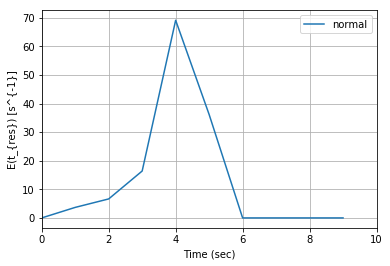

In [72]:
class Particle():
    """reads a csv file with x, y and z coordinates"""
    def __init__(self,csvfile,deltaT):
        self.csvfile = csvfile
        self.deltaT = deltaT
        self.x,self.y,self.z = np.loadtxt(self.csvfile,delimiter=',',unpack=True)
        self.vx = np.gradient(self.x,deltaT)
        self.vy = np.gradient(self.y,deltaT)
        self.vz = np.gradient(self.z,deltaT)
        self.ax = np.gradient(self.vx,deltaT)
        self.ay = np.gradient(self.vy,deltaT)
        self.az = np.gradient(self.vz,deltaT)
        
        self.v = np.sqrt(self.vx**2+self.vy**2+self.vz**2)
        self.v_mean = np.mean(self.v)
        self.v_std = np.std(self.v)

    def divisions(self,domain,divisions):
        """ Divides the domain into equal parts and count the occurances"""
        size = domain.height/divisions
        counter = []
        for i in range(divisions):
            count = ((self.z >= i*size) & (self.z < (i+1)*size)).sum()
            counter.append(count)
        return counter

    def report(self):
        u_rms = np.mean(self.vx)
        #u_fluc = vx[110,:] - u_rms
        u_fluc = self.vx - u_rms
        #velx = np.mean(vx,axis=1)
        sigma_u = np.std(self.vx)
        #acelx = np.mean(Dvx,axis=1)

        print("Data size: {}".format(self.vx))
        corrx = np.corrcoef(self.v)

        Li = np.sum(np.mean(corrx))/(3*np.var(self.vx))*self.deltaT
        print('Integral scale:', Li)
        Ti = Li/sigma_u
        print('Integral time:', Ti)
        A = 0.5 #0.5 - 1.0
        epsilon = A*np.std(self.vx)**3/Li
        print('Epsilon:',epsilon)
        nu = 1.5e-5 #viscosity
        Re_L = np.std(self.vx)*Li/nu
        print('Integral Reynolds number:',Re_L)
        eta = (nu**3/epsilon)**(1./4.) #kolmogorov lenght scale
        print('Kolmogorov lenght scale:',eta)
        tau_l = np.sqrt(2*np.mean(u_fluc**2)/np.mean(self.ax**2))
        print('tau_l ???', tau_l)
        tau_eta = (nu/epsilon)**0.5
        print('Kolmogorov time scale', tau_eta)
        taylor = (15*nu/epsilon)**0.5 * sigma_u
        print('Taylor microscale:',taylor)
        Re_taylor = sigma_u*taylor/nu
        print('Reynolds Taylor',Re_taylor)
        Te = tau_l/u_rms #large-eddy turnover time
        print('Large-eddy turnover time', Te)

        
# A Lagrangian description of #ows in stirred tanks via computer-automated radioactive particle tracking (CARPT)
# A. R. Rammohan, A. Kemoun, M. H. Al-Dahhan, M. P. Dudukovic

    def pdf_STD(self,counter,deltaT):
        #bins = np.linspace(0, 2, 5)
        #y, bins = np.histogram(self.v,bins=bins, density=True)
        t_res = np.multiply(counter,deltaT)
        
        fig, ax = plt.subplots()
        plt.plot(STD, label='normal')
        ax.set_xlabel('Time (sec)')
        ax.set_xlim(0, 10)
        ax.set_ylabel(r'E(t_{res}) [s^{-1}]')
        ax.grid(which="both")
        ax.legend()
        plt.show()          
    def mean_STD(self,counter):
        """Mean of the Sojourn Time Distribution (STD)"""
      
        
        pass
    def variance_STD(self):
        pass
    def skewness_STD(self):
        pass
    def kurtosis_STD(self):
        pass
    def spectrum(self):
        pass
    def norm_stats():
        mean, var, skew, kurt = norm.stats(moments='mvsk')
        
    def trace(self,domain):
        x_grid, y_grid, z_grid = domain.draw()
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5)
        ax.plot(self.x,self.y,self.z,label='particle 1')
        ax.legend()
        plt.show()
    
    def singletime(self):
        


        #v = np.random.normal(size=10000) #random data
        
        #bins = np.linspace(min(v), max(v), 100)
        bins = np.linspace(self.v_mean-4*self.v_std, self.v_mean+4*self.v_std, 100)
        y, bins = np.histogram(self.v,bins=bins, density=True)

        # normal distribution pdf
        bin_centers = 0.5*(bins[1:] + bins[:-1])
        pdf = norm.pdf(bin_centers,self.v_mean,self.v_std)

        fig, ax = plt.subplots()
        plt.plot(bin_centers, y, label='data')
        plt.plot(bin_centers, pdf, label='normal')
        ax.set_xlabel('v[m/s]')
        ax.set_xlim(self.v_mean-4*self.v_std, self.v_mean+4*self.v_std)
        ax.set_ylabel('PDF')
        ax.grid(which="both")
        ax.legend()
        plt.show()
        print(np.sum(y))
        print(np.sum(pdf))

        
    def multiscale(self):
        """Two time statistics"""
        v = np.sqrt(self.vx**2+self.vy**2+self.vz**2)
        v_mean = np.mean(v)
        v_std = np.std(v)
        v = (v_std)/np.sqrt(np.mean((v_std)**2))

        #v = np.random.normal(size=10000) #random data
        
        #bins = np.linspace(min(v), max(v), 100)
        bins = np.linspace(v_mean-4*v_std, v_mean+4*v_std, 100)
        y, bins = np.histogram(v,bins=bins, density=True)

        # normal distribution pdf
        bin_centers = 0.5*(bins[1:] + bins[:-1])
        pdf = norm.pdf(bin_centers,v_mean,v_std)

        fig, ax = plt.subplots()
        plt.plot(bin_centers, y, label='data')
        #plt.plot(bin_centers, pdf, label='normal')
        ax.set_xlabel('v[m/s]')
        #ax.set_xlim(v_mean-4*v_std, v_mean+4*v_std)
        ax.set_ylabel('PDF')
        ax.grid(which="both")
        ax.legend()
        plt.show()
        
    def correlation(self):       
        corr_x = np.correlate(self.vx, self.vx, mode='full')
        corr_x = corr_x[int(corr_x.size/2):] #take half of the correlation      
        corr_y = np.correlate(self.vy, self.vy, mode='full')
        corr_y = corr_y[int(corr_y.size/2):] #take half of the correlation  
        corr_z = np.correlate(self.vz, self.vz, mode='full')
        corr_z = corr_z[int(corr_z.size/2):] #take half of the correlation  
        fig, ax = plt.subplots()
        plt.plot(corr_x/max(corr_x), label='x')
        plt.plot(corr_y/max(corr_y), label='y')
        plt.plot(corr_z/max(corr_z), label='z')
        ax.set_xlabel('time')
        ax.set_ylabel('correlation')
        ax.grid(which="both")
        ax.legend()
        plt.show()
        
    def __len__(self):
        return len(x)
    def __repr__(self):
        return 'Particle('+self.csvfile+','+str(self.deltaT)+')'
d0 = Domain(1200,1200)
p0 = Particle('particle0.csv',0.04)
#p0.trace(d0)
#p0.singletime()
#p0.multiscale()
#p0.correlation()
counter = p0.divisions(d0,10)
p0.pdf_STD(counter,0.04)

In [17]:
p0.report()

Data size: [-2.83813477 -2.84910202 -2.8678894  ... -2.52227783 -2.28729248
 -2.16674805]
Integral scale: 0.00014693735865465172
Integral time: 1.5425135039237166e-05
Epsilon: 2941355.6343256356
Integral Reynolds number: 93.3134450729731
Kolmogorov lenght scale: 5.820114918701806e-06
tau_l ??? 1.7713286627731422
Kolmogorov time scale 2.2582491777930225e-06
Taylor microscale: 8.33145291510234e-05
Reynolds Taylor 52.90938812903806
Large-eddy turnover time -0.2294197801731418


ValueError: x and y must have same first dimension, but have shapes (101,) and (100,)

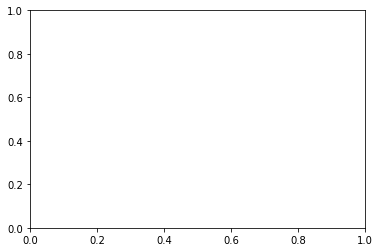